In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [19]:
im = cv2.imread('hand.jpg')
img = im.copy()
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [20]:
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [23]:
im = cv2.drawContours(img, contours, -1, (0,0,255), 3)

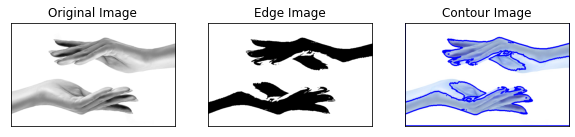

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(131),plt.imshow(imgray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(im,cmap = 'gray')
plt.title('Contour Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
im = cv2.imread('puma.jpg')
img = im.copy()
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [3]:
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [6]:
im = cv2.drawContours(img, contours, -1, (255,0,0), 3)

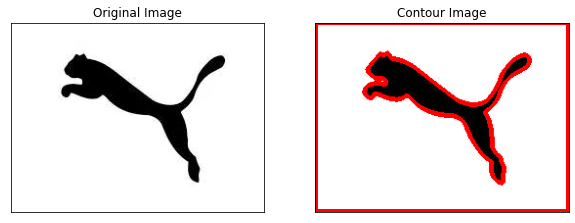

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(imgray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(im,cmap = 'gray')
plt.title('Contour Image'), plt.xticks([]), plt.yticks([])
plt.show()

## 1.Moments(904,543)->(4,295)

In [87]:
cnt = contours[1]
M = cv2.moments(cnt)
print (M)

{'m00': 5152.5, 'm10': 669294.8333333333, 'm01': 407186.3333333333, 'm20': 97612317.41666666, 'm11': 56538190.875, 'm02': 36567198.25, 'm30': 15476840392.050001, 'm21': 8594272020.966667, 'm12': 5434241723.766666, 'm03': 3686450760.4, 'mu20': 10672856.19848241, 'mu11': 3645864.993594013, 'mu02': 4388506.342490166, 'mu30': 24536706.89208603, 'mu21': -66905819.60560703, 'mu12': 108025390.85244906, 'mu03': 103036303.62991238, 'nu20': 0.4020172209420499, 'nu11': 0.13732973492728032, 'nu02': 0.16530299772476265, 'nu30': 0.012875712590283589, 'nu21': -0.03510903511412157, 'nu12': 0.05668665690088186, 'nu03': 0.05406861799909437}


In [88]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [89]:
(w,h,c) = img.shape

In [90]:
img = np.zeros(im.shape,np.uint8)
img =cv2.circle(img,(cx,cy),3,(255,255,0),2)
img =cv2.drawContours(img,contours[1],-1,(255,0,0),3)

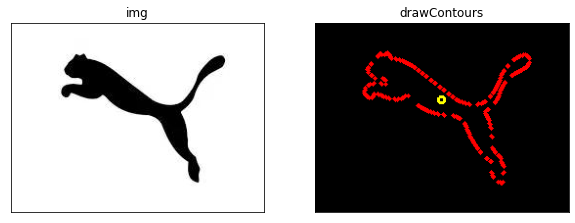

In [91]:
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(imgray,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('drawContours'), plt.xticks([]), plt.yticks([])
plt.show()

## 2. Contour Area

In [92]:
area = cv2.contourArea(cnt)

## 3. Contour Perimeter

In [93]:
perimeter = cv2.arcLength(cnt,True)

## 4. Contour Approximation

In [94]:
epsilon = 0.001*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [95]:
imgA = np.zeros(im.shape,np.uint8)
imgA = cv2.drawContours(imgA,approx,-1,(0,255,0),3)

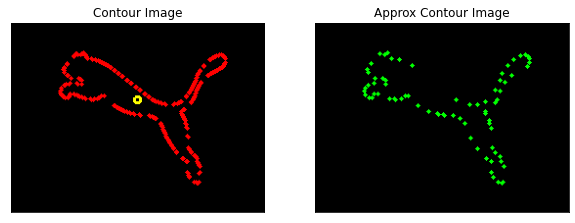

In [96]:
plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Contour Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgA,cmap = 'gray')
plt.title('Approx Contour Image'), plt.xticks([]), plt.yticks([])
plt.show()

## 5. Convex Hull

In [82]:
hull = cv2.convexHull(cnt)

In [83]:
imgH = np.zeros(im.shape,np.uint8)
img = cv2.drawContours(img,[hull],-1,(0,255,0),3)

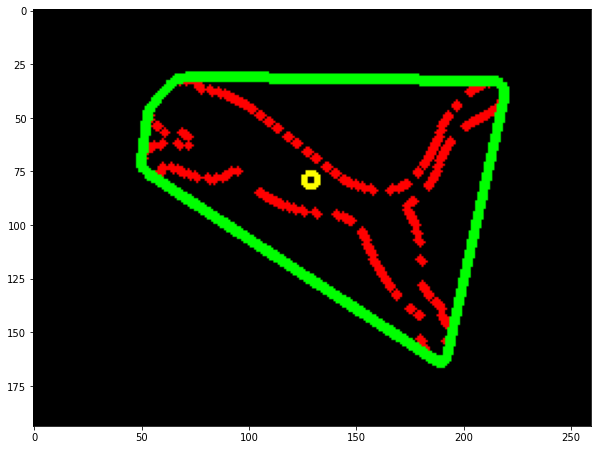

In [84]:
plt.figure(figsize=(10,10))
plt.imshow(img,cmap = 'gray')
plt.show()

## 8. Minimum Enclosing Circle

In [97]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)

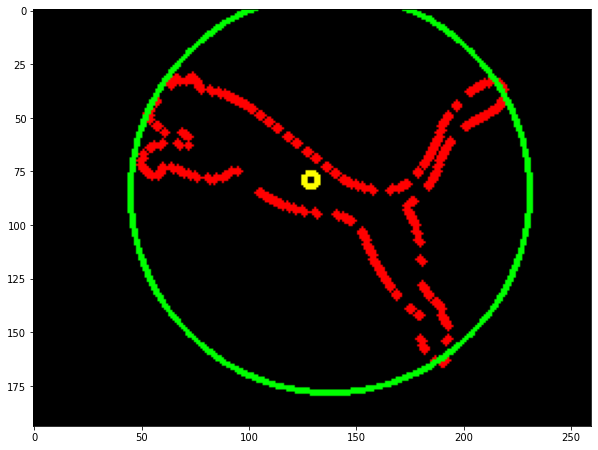

In [101]:
plt.figure(figsize=(10,10))
plt.imshow(img, 'gray')
plt.show()